**Flights Data Exploration**

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

In [204]:
import pandas as pd

url= 'https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/flights.csv'
df_flights = pd.read_csv(url)
df_flights.head()


,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


  explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

Start by cleaning the data.

Identify any null or missing data, and impute appropriate replacement values.

Identify and eliminate any outliers in the DepDelay and ArrDelay columns.
Explore the cleaned data.

View summary statistics for the numeric fields in the dataset.

Determine the distribution of the DepDelay and ArrDelay columns.

Use statistics, aggregate functions, and visualizations to answer the following questions:

What are the average (mean) departure and arrival delays?

How do the carriers compare in terms of arrival delay performance?

Are some days of the week more prone to arrival days than others?

Which departure airport has the highest average departure delay?

Do late* departures tend to result in longer arrival delays than

on-time departures?*

Which route (from origin airport to destination airport) has the most late* arrivals?*

Which route has the highest average arrival delay?

**Clean missing values**

Find how many null values there are for each column.

In [205]:
df_flights.isnull().sum()


Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [206]:
df_flights[df_flights.isnull().any(axis=1)][['DepDelay','DepDel15']]

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


In [207]:
df_flights[df_flights.isnull().any(axis=1)].DepDelay.describe()

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

The min, max, and mean are all 0; so it seems that none of these were actually late departures. Let's replace the missing **DepDel15** indicator with a 0 and confirm there are no more missing values.

In [208]:
df_flights.DepDel15=df_flights.DepDel15.fillna(0)
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

**Clean outliers**

View the distribution and summary statistics for the **DepDelay** and ArrDelay columns.

DepDelay 
Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00

ArrDelay 
Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



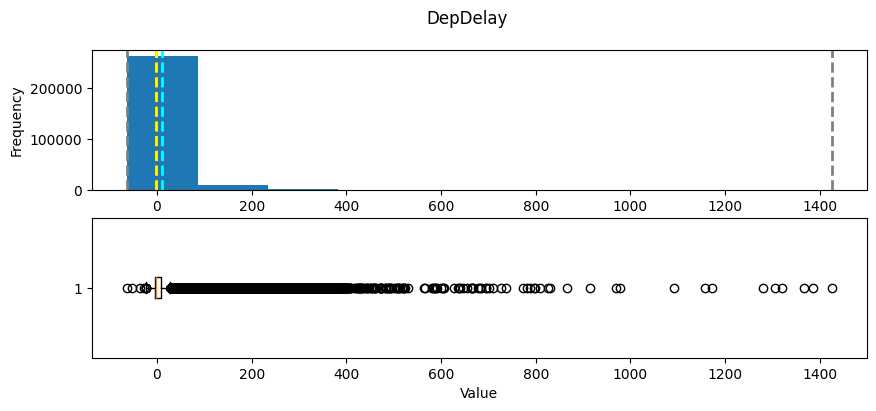

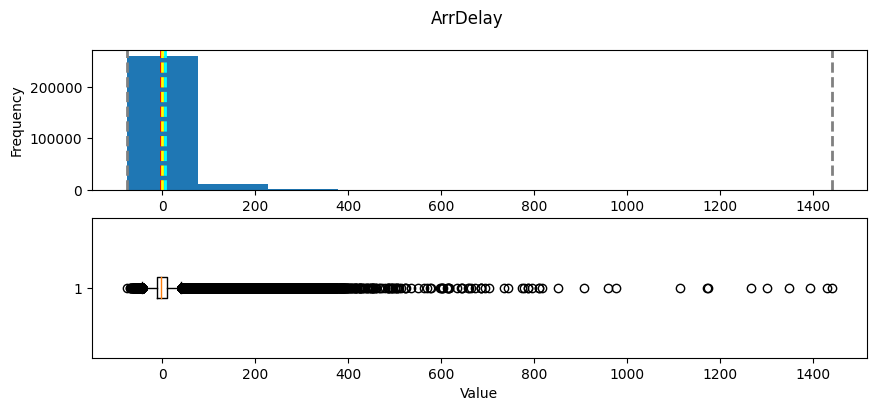

In [209]:
# Function to show summary stats and distribution for a column
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(var_data.name,'\nMinimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(var_data.name)

    # Show the figure
    fig.show()

# Call the function for each delay field
delayFields = ['DepDelay','ArrDelay']
for col in delayFields:
    show_distribution(df_flights[col])

There are a outliers at the lower and upper ends of both variables - particularly at the upper end.

Let's trim the data so that we include only rows where the values for these fields are within the 1st and 90th percentile.

DepDelay 
Minimum:-11.00
Mean:-0.92
Median:-2.00
Mode:-3.00
Maximum:16.00

ArrDelay 
Minimum:-32.00
Mean:-5.03
Median:-6.00
Mode:0.00
Maximum:37.00



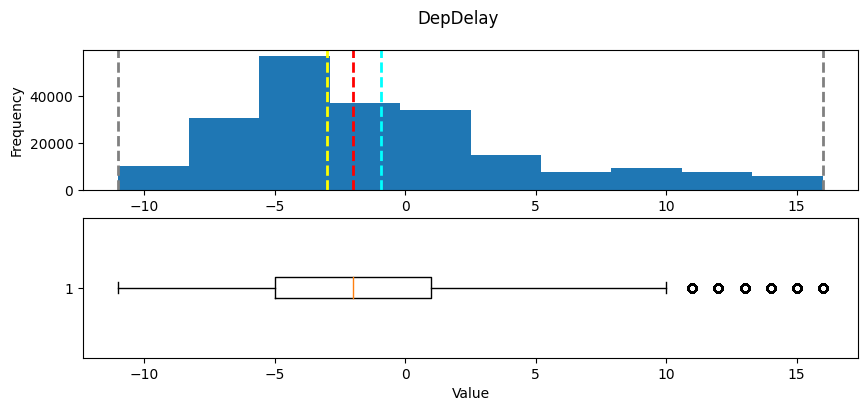

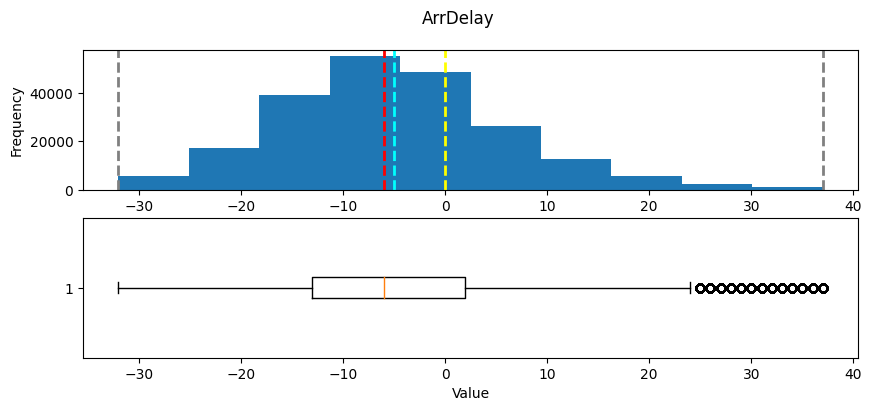

In [210]:
# Trim outliers for ArrDelay based on 1% and 90% percentiles
ArrDelay_01pcntile = df_flights.ArrDelay.quantile(0.01)
ArrDelay_90pcntile = df_flights.ArrDelay.quantile(0.90)
df_flights = df_flights[df_flights.ArrDelay < ArrDelay_90pcntile]
df_flights = df_flights[df_flights.ArrDelay > ArrDelay_01pcntile]

# Trim outliers for DepDelay based on 1% and 90% percentiles
DepDelay_01pcntile = df_flights.DepDelay.quantile(0.01)
DepDelay_90pcntile = df_flights.DepDelay.quantile(0.90)
df_flights = df_flights[df_flights.DepDelay < DepDelay_90pcntile]
df_flights = df_flights[df_flights.DepDelay > DepDelay_01pcntile]

# View the revised distributions
for col in delayFields:
    show_distribution(df_flights[col])

**Explore the data**

Let's start with an overall view of the summary statistics for the numeric columns.

In [211]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214397.0,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000
mean,2013.0,7.018368,15.794703,3.902737,12757.827661,12726.276147,1278.223879,-0.921692,0.018116,1461.406596,-5.030276,0.068602,0.013228
std,0.0,2.006398,8.859118,1.997744,1510.058629,1506.251757,469.440262,5.708594,0.133371,485.676457,11.424280,0.252776,0.114249
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,850.000000,-5.000000,0.000000,1054.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1235.000000,-2.000000,0.000000,1445.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1655.000000,1.000000,0.000000,1845.000000,2.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,16.000000,1.000000,2359.000000,37.000000,1.000000,1.000000


What are the mean departure and arrival delays?

In [212]:
df_flights[delayFields].mean()

DepDelay   -0.921692
ArrDelay   -5.030276
dtype: float64

How do the carriers compare in terms of arrival delay performance?

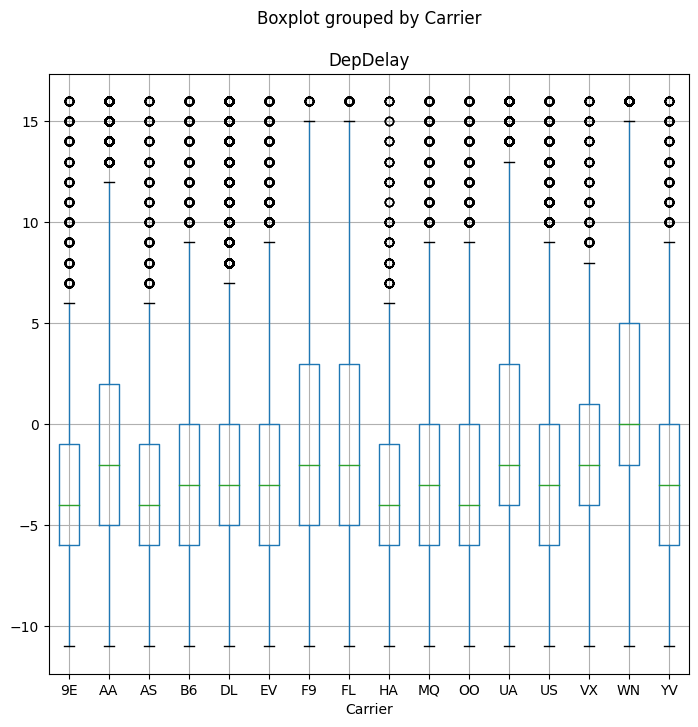

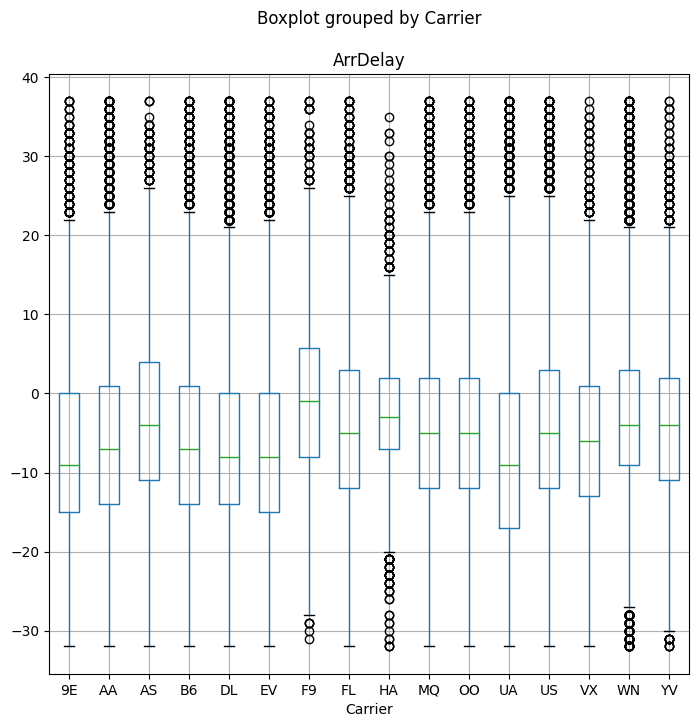

In [213]:
for col in delayFields:
    df_flights.boxplot(column=col, by='Carrier', figsize=(8,8))

Are some days of the week more prone to arrival days than others?

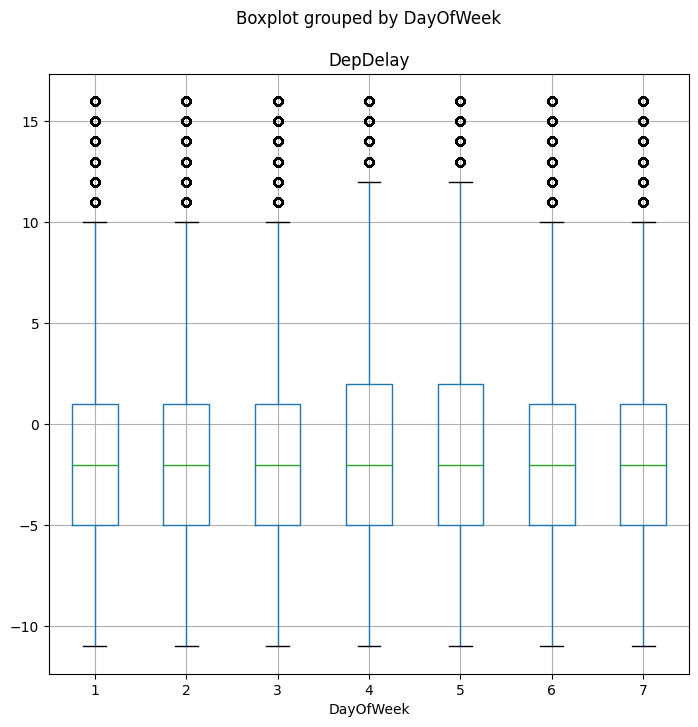

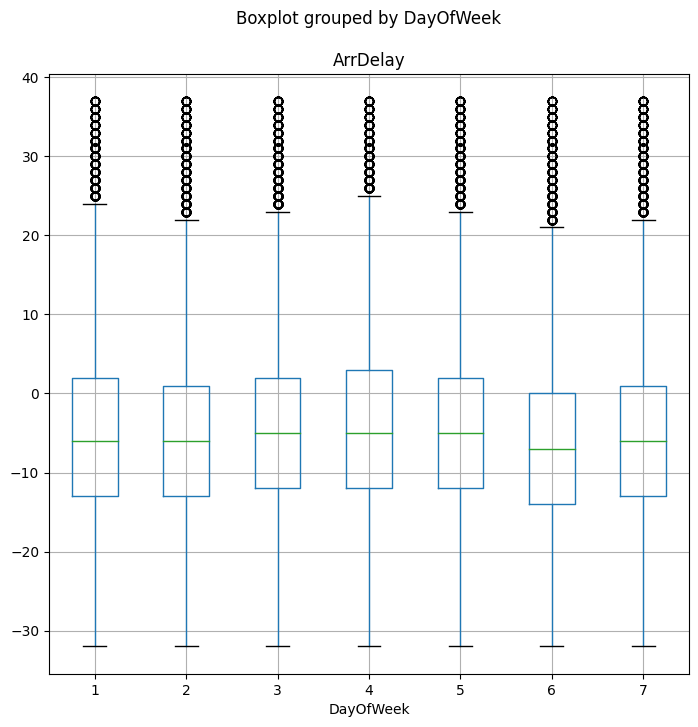

In [214]:
for col in delayFields:
    df_flights.boxplot(column=col, by='DayOfWeek', figsize=(8,8))


Which departure airport has the highest average departure delay?

,DepDelay
OriginAirportName,
Chicago Midway International,2.365960
Dallas Love Field,2.148798
William P Hobby,1.561927
Metropolitan Oakland International,0.964853
Denver International,0.807272
...,...
Memphis International,-2.962737
Tucson International,-2.989154
Ted Stevens Anchorage International,-3.149758


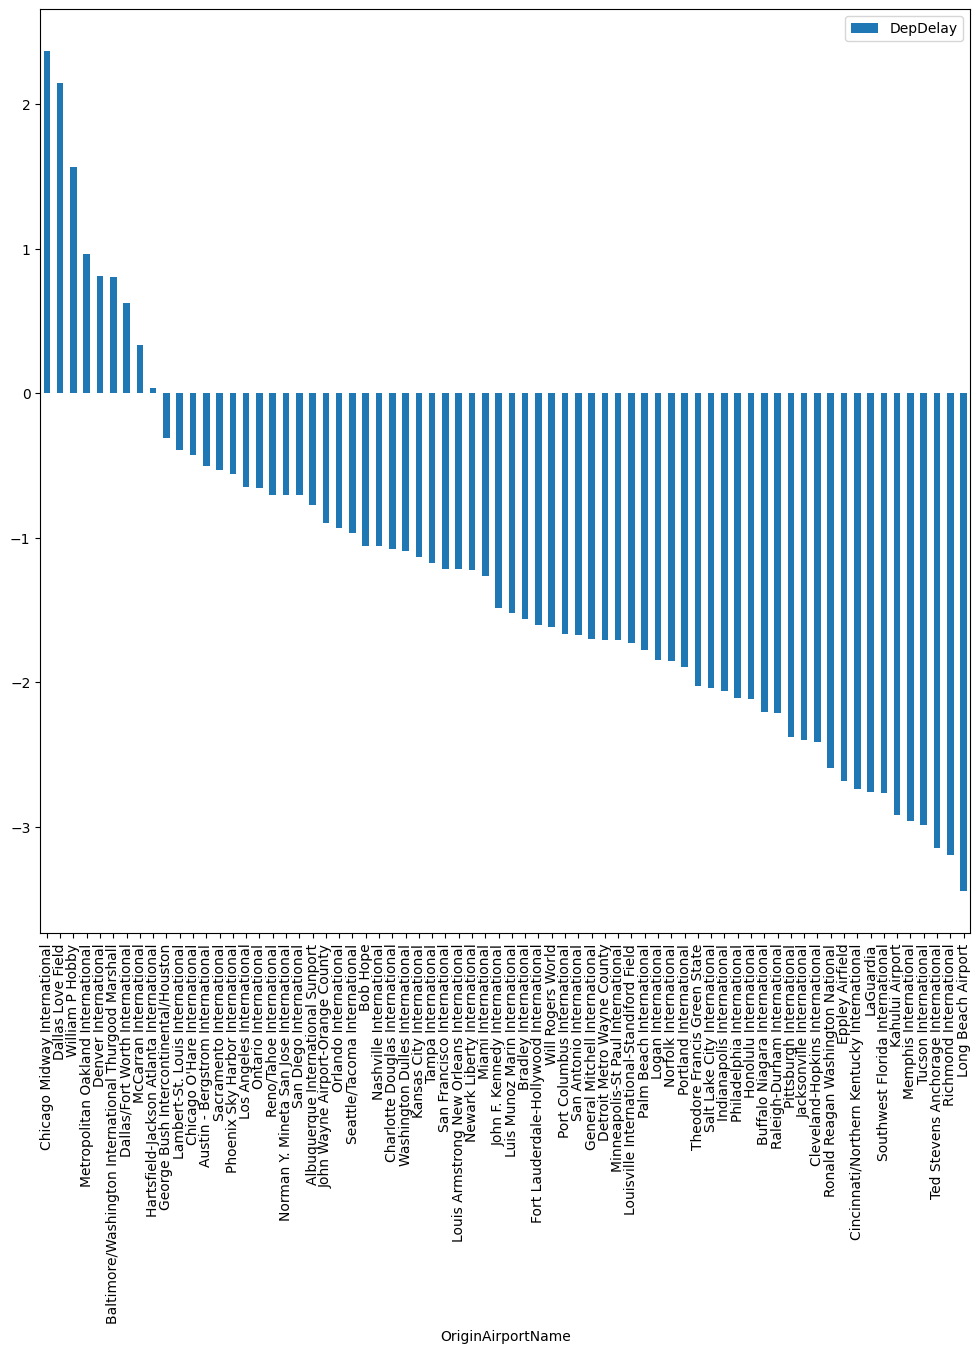

In [215]:
departure_airport_group = df_flights.groupby(df_flights.OriginAirportName)

mean_departure_delays = pd.DataFrame(departure_airport_group['DepDelay'].mean()).sort_values('DepDelay', ascending=False)
mean_departure_delays.plot(kind = "bar", figsize=(12,12))
mean_departure_delays

Do late departures tend to result in longer arrival delays than on-time departures?

<Axes: title={'center': 'ArrDelay'}, xlabel='DepDel15'>

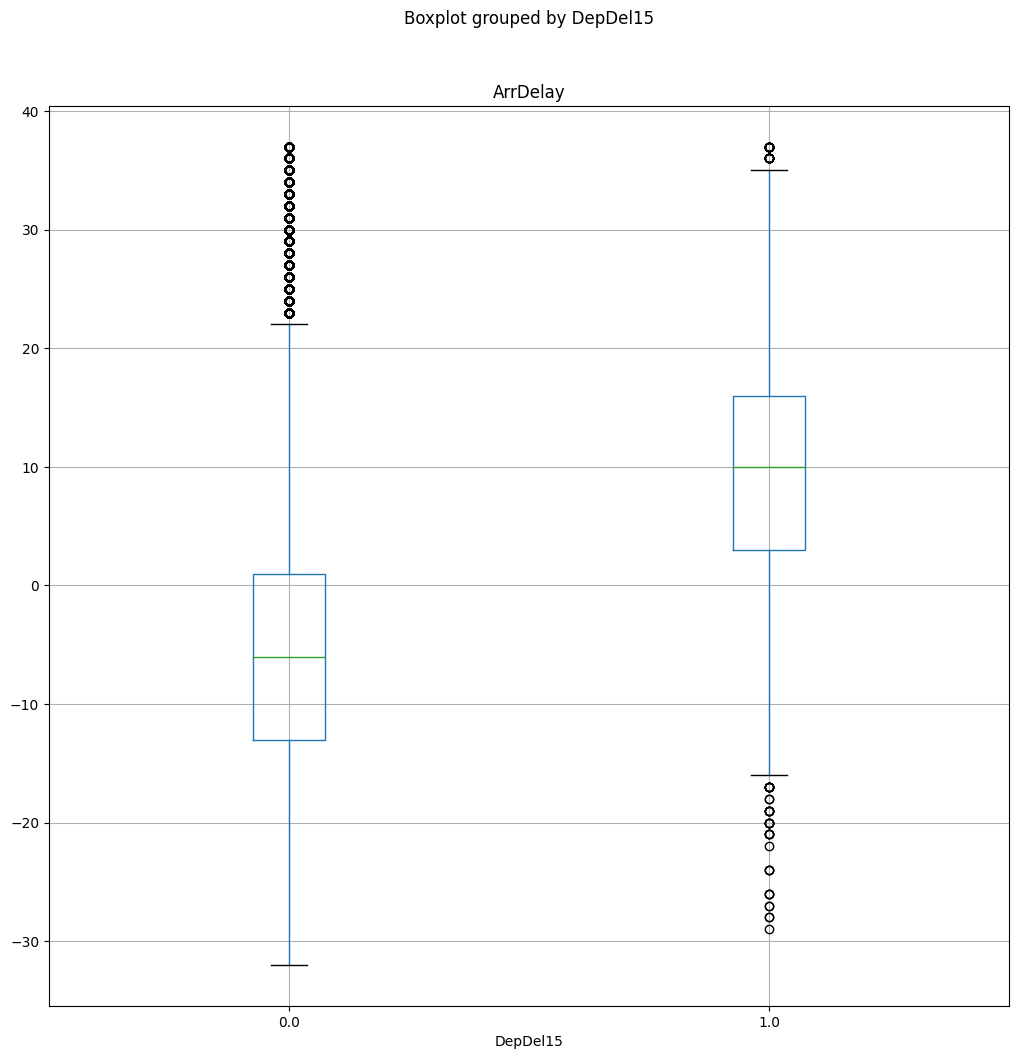

In [216]:
df_flights.boxplot(column='ArrDelay', by='DepDel15', figsize=(12,12))

Which route (from origin airport to destination airport) has the most late arrivals?

In [217]:
# Add a routes column
routes  = pd.Series(df_flights['OriginAirportName'] + ' > ' + df_flights['DestAirportName'])
df_flights = pd.concat([df_flights, routes.rename("Route")], axis=1)

# Group by routes
route_group = df_flights.groupby(df_flights.Route)
pd.DataFrame(route_group['ArrDel15'].sum()).sort_values('ArrDel15', ascending=False)

,ArrDel15
Route,
San Francisco International > Los Angeles International,90
Los Angeles International > San Francisco International,69
LaGuardia > Hartsfield-Jackson Atlanta International,68
Los Angeles International > John F. Kennedy International,52
LaGuardia > Charlotte Douglas International,51
...,...
Logan International > Austin - Bergstrom International,0
Logan International > Memphis International,0
Logan International > Port Columbus International,0


Which route has the highest average arrival delay?

In [218]:
pd.DataFrame(route_group['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)

,ArrDelay
Route,
Louis Armstrong New Orleans International > Ronald Reagan Washington National,24.500000
Cleveland-Hopkins International > Palm Beach International,18.000000
John F. Kennedy International > Louisville International-Standiford Field,18.000000
Cleveland-Hopkins International > Philadelphia International,12.800000
Memphis International > Denver International,9.758621
...,...
Lambert-St. Louis International > Cleveland-Hopkins International,-20.000000
Eppley Airfield > LaGuardia,-20.750000
Denver International > Kahului Airport,-22.666667
